<a href="https://colab.research.google.com/github/sergekamanzi/Water-Quality-Model/blob/kuir/Water_Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


# Load dataset
df = pd.read_csv("/content/water_potability.csv")

# Handle missing values (impute with median)
df.fillna(df.median(), inplace=True)

# Split into features (X) and target (Y)
X = df.drop(columns=["Potability"])
Y = df["Potability"]

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training (70%), validation (15%), and testing (15%)
X_train, X_temp, Y_train, Y_temp = train_test_split(X_scaled, Y, test_size=0.3, random_state=42, stratify=Y)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42, stratify=Y_temp)

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# --- Model 3: Adam Optimizer + Batch Normalization + Lower Dropout ---
def build_model_3():
    model = Sequential([
        Dense(64, activation='relu', input_shape=(9,)),
        BatchNormalization(),  # Add Batch Normalization
        Dropout(0.2),  # Lower Dropout
        Dense(32, activation='relu'),
        BatchNormalization(),  # Add Batch Normalization
        Dropout(0.2),  # Lower Dropout
        Dense(1, activation='sigmoid')  # Output layer
    ])
    optimizer = Adam(learning_rate=0.001)  # Use Adam optimizer
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Train Model 3
model_3 = build_model_3()
history_3 = model_3.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=100, batch_size=32, callbacks=[early_stopping], verbose=1)

# Evaluate Model 3
results_3 = model_3.evaluate(X_test, Y_test, verbose=1)
print("Model 3 - Loss: {:.4f}, Accuracy: {:.4f}".format(results_3[0], results_3[1]))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.4855 - loss: 0.9454 - val_accuracy: 0.5662 - val_loss: 0.6830
Epoch 2/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5813 - loss: 0.7259 - val_accuracy: 0.5988 - val_loss: 0.6683
Epoch 3/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6055 - loss: 0.6924 - val_accuracy: 0.6334 - val_loss: 0.6541
Epoch 4/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6180 - loss: 0.6756 - val_accuracy: 0.6415 - val_loss: 0.6447
Epoch 5/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6218 - loss: 0.6566 - val_accuracy: 0.6599 - val_loss: 0.6388
Epoch 6/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6444 - loss: 0.6468 - val_accuracy: 0.6497 - val_loss: 0.6379
Epoch 7/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6345 - loss: 0.6441 - val_accuracy: 0.6456 - val_loss: 0.6370
Epoch 8/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6506 - loss: 0.6128 - val_accuracy: 0.6456 - v

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step
Model 3 - Accuracy: 0.6890
Model 3 - Precision: 0.6822
Model 3 - Recall: 0.3802
Model 3 - F1 Score: 0.4883


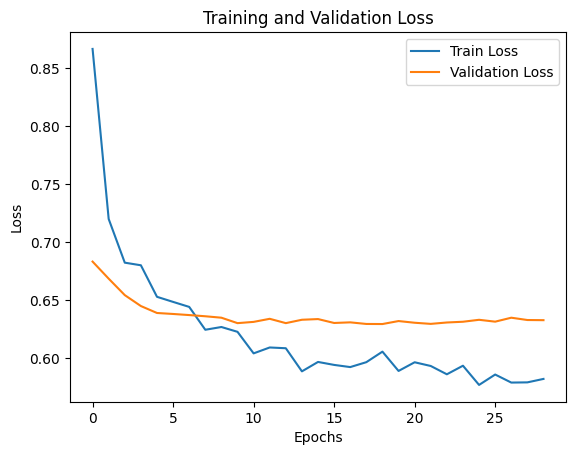

In [3]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict on test set
Y_pred_probs = model_3.predict(X_test)
Y_pred = (Y_pred_probs > 0.5).astype(int)

# Calculate metrics
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)

print(f"Model 3 - Accuracy: {accuracy:.4f}")
print(f"Model 3 - Precision: {precision:.4f}")
print(f"Model 3 - Recall: {recall:.4f}")
print(f"Model 3 - F1 Score: {f1:.4f}")

# Plot training & validation loss
plt.plot(history_3.history['loss'], label='Train Loss')
plt.plot(history_3.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()
